In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sklearn.model_selection as skl_ms
import sklearn.preprocessing as skl_pr
import sklearn.linear_model as skl_lm
import sklearn.discriminant_analysis as skl_da
import sklearn.neighbors as skl_nb
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import RandomizedSearchCV

#from IPython.display import set_matplotlib_formats
#set_matplotlib_formats('png')
from IPython.core.pylabtools import figsize
figsize(10, 6) # Width and hight
#plt.style.use('seaborn-white')

In [ ]:
url = 'https://raw.githubusercontent.com/Ari-vu/SML/main/Given_data/train.csv'
data = pd.read_csv(url)

In [ ]:
x = data.drop(columns=['Lead'])
y = data['Lead']



LDA

In [ ]:
model = skl_da.LinearDiscriminantAnalysis()
model.fit(x, y)
print('Accuracy on training data: %.2f' %np.mean(model.predict(x)==y))

Accuracy on training data: 0.87


In [ ]:
predict_prob = model.predict_proba(x)
print('The class order in the model:')
print(model.classes_)
print('Examples of predicted probablities for the above classes:') 
with np.printoptions(suppress=True, precision=3): # Supress scienti fic notaion, e.g. 1.0e-2.
  print(predict_prob[0:5]) # inspect the first 5 predictions

The class order in the model:
['Female' 'Male']
Examples of predicted probablities for the above classes:
[[0.978 0.022]
 [0.068 0.932]
 [0.036 0.964]
 [0.015 0.985]
 [0.199 0.801]]


In [ ]:
model.get_params()

{'covariance_estimator': None,
 'n_components': None,
 'priors': None,
 'shrinkage': None,
 'solver': 'svd',
 'store_covariance': False,
 'tol': 0.0001}

In [ ]:
prediction = np.empty(len(x), dtype=object)
prediction = np.where(predict_prob[:, 0]>=0.5, 'Female', 'Male')
prediction[0:5] # Inspect the first 5 predictions after labeling

array(['Female', 'Male', 'Male', 'Male', 'Male'], dtype='<U6')

In [ ]:
# Accuracy
print(f"Accuracy: {np.mean(prediction == y):.3f}")

Accuracy: 0.885


In [ ]:
solvers = ['svd', 'lsqr', 'eigen']

random_grid = {'solver': solvers}

In [ ]:
CV = RandomizedSearchCV(estimator=model, param_distributions=random_grid, n_iter=10, cv=3, verbose=2, random_state=1, n_jobs=-1)
CV.fit(x, y)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
1 fits failed out of a total of 9.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py", line 603

RandomizedSearchCV(cv=3, estimator=LinearDiscriminantAnalysis(), n_jobs=-1,
                   param_distributions={'solver': ['svd', 'lsqr', 'eigen']},
                   random_state=1, verbose=2)

In [ ]:
CV.best_params_

{'solver': 'svd'}

Default values are the best

QDA

In [ ]:
model = skl_da.QuadraticDiscriminantAnalysis() 
model.fit(x, y)

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis()

In [ ]:
predict_prob = model.predict_proba(x)
print('The class order in the model:')
print(model.classes_, '\n')
print('Examples of predicted probablities for the above classes:') 
with np.printoptions(suppress=True, precision=3):
  print(predict_prob[0:5]) # inspect the first 5 predictions

The class order in the model:
['Female' 'Male'] 

Examples of predicted probablities for the above classes:
[[0.978 0.022]
 [0.068 0.932]
 [0.036 0.964]
 [0.015 0.985]
 [0.199 0.801]]


In [ ]:
# Accuracy
print('Accuracy:')
print(f"{np.mean(prediction == y):.3f}")

First five predictions:
['Female' 'Male' 'Male' 'Male' 'Male'] 

Accuracy:
0.885


/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminan

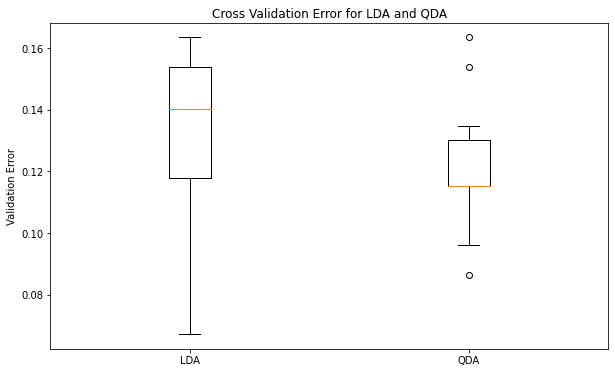

The LDA and QDA Ek−fold error is:
[0.13090926 0.12126587]


In [ ]:
x = data.drop(columns=['Lead'])
y = data['Lead']
n_fold = 10
modelList = []
modelList.append(skl_da.LinearDiscriminantAnalysis())
modelList.append(skl_da.QuadraticDiscriminantAnalysis())
misclassification = np.zeros((n_fold , len(modelList)))
cv = skl_ms.KFold(n_splits = n_fold, random_state = 31, shuffle = True)
for i, (train_index , val_index) in enumerate(cv.split(x)): 
  X_train , X_val = x.iloc[train_index], x.iloc[val_index]
  Y_train , Y_val = y.iloc[train_index], y.iloc[val_index]

  for m in range(np.shape(modelList)[0]):
    model = modelList[m]
    model.fit(X_train , Y_train)
    prediction = model.predict(X_val)
    misclassification[i, m] = np.mean(prediction != Y_val)

plt.boxplot(misclassification)
plt.title('Cross Validation Error for LDA and QDA') 
plt.xticks(np.arange(2)+1, ('LDA', 'QDA')) 
plt.ylabel('Validation Error')
plt.show()
QDA_Ek_fold = misclassification .mean( axis=0) 
print('The LDA and QDA Ek−fold error is:')
print(QDA_Ek_fold)

According to the boxplot, it seems that QDA shows a higher performance compared to LDA.